In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
from keras.utils import to_categorical

train_data_dir =r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Train"
test_data_dir = r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Test"
val_data_dir = r"/content/drive/MyDrive/augmented zipten cıkarilmis/test,train,val/Validation"

datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5, 1.5)
)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'  
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=32,
    shuffle=False
)



Found 28949 images belonging to 10 classes.
Found 5797 images belonging to 10 classes.
Found 3860 images belonging to 10 classes.


In [ ]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') 
])


cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = cnn.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator
)




In [ ]:
cnn.save('/content/drive/Shareddrives/yeni derin öğrenme ortak drive/CNNaaugmentedveriseti9OCAAKGECE.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/Shareddrives/yeni derin öğrenme ortak drive/CNNaaugmentedveriseti9OCAAKGECE.h5'  
loaded_model = load_model(model_path)


    epoch    loss  accuracy  val_loss  val_accuracy
0       1  1.6015    0.5323    1.0513        0.6352
1       2  0.7409    0.7505    0.7576        0.7490
2       3  0.5080    0.8303    0.4544        0.8451
3       4  0.4001    0.8659    0.3776        0.8818
4       5  0.3492    0.8848    0.3005        0.8967
5       6  0.2941    0.9028    0.2546        0.9170
6       7  0.2620    0.9164    0.2353        0.9227
7       8  0.2505    0.9199    0.2019        0.9291
8       9  0.2311    0.9277    0.2177        0.9277
9      10  0.1989    0.9360    0.1579        0.9495
10     11  0.2184    0.9317    0.2574        0.9196
11     12  0.1966    0.9382    0.2137        0.9341


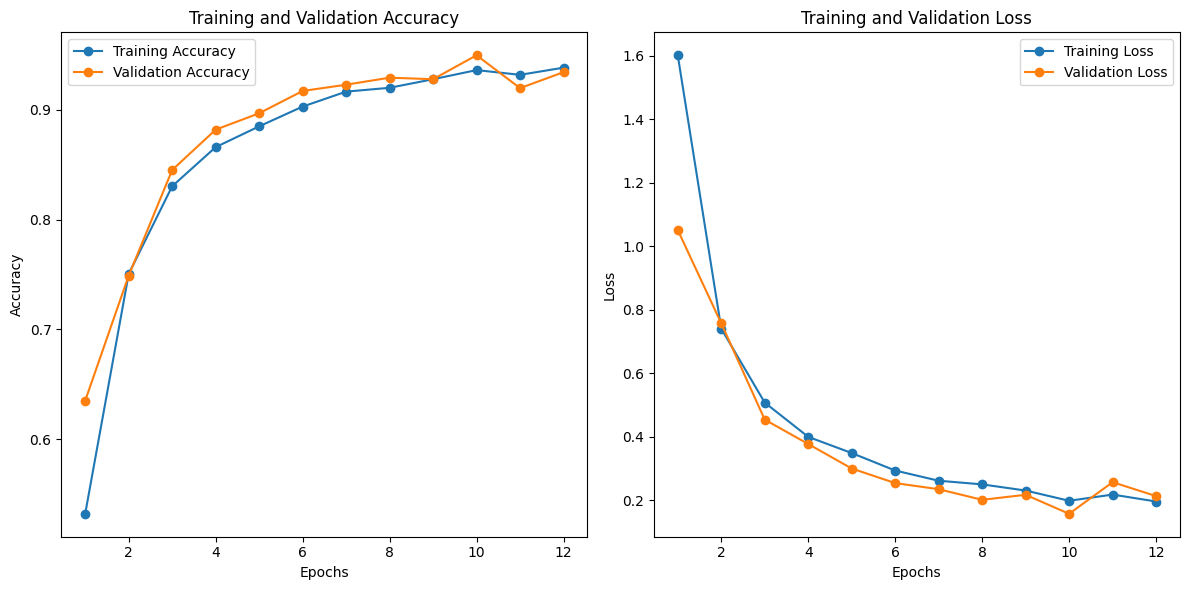

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'loss': [1.6015, 0.7409, 0.5080, 0.4001, 0.3492, 0.2941, 0.2620, 0.2505, 0.2311, 0.1989, 0.2184, 0.1966],
    'accuracy': [0.5323, 0.7505, 0.8303, 0.8659, 0.8848, 0.9028, 0.9164, 0.9199, 0.9277, 0.9360, 0.9317, 0.9382],
    'val_loss': [1.0513, 0.7576, 0.4544, 0.3776, 0.3005, 0.2546, 0.2353, 0.2019, 0.2177, 0.1579, 0.2574, 0.2137],
    'val_accuracy': [0.6352, 0.7490, 0.8451, 0.8818, 0.8967, 0.9170, 0.9227, 0.9291, 0.9277, 0.9495, 0.9196, 0.9341]
}

df = pd.DataFrame(epoch_data)
print(df)

epochs_range = epoch_data['epoch']
acc = epoch_data['accuracy']
val_acc = epoch_data['val_accuracy']
loss = epoch_data['loss']
val_loss = epoch_data['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


121/121 [==============================] - 906s 8s/step - loss: 0.2163 - accuracy: 0.9334
Test accuracy: 0.9334197044372559
121/121 [==============================] - 277s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       396
           1       0.99      0.98      0.98       379
           2       0.85      0.96      0.90       388
           3       0.95      0.96      0.95       386
           4       0.88      0.93      0.91       386
           5       0.95      0.95      0.95       384
           6       0.94      0.80      0.87       392
           7       0.84      0.98      0.90       379
           8       1.00      0.96      0.98       386
           9       0.98      0.86      0.91       384

    accuracy                           0.93      3860
   macro avg       0.94      0.93      0.93      3860
weighted avg       0.94      0.93      0.93      3860

Overall Precision: 0.94
Overall Recall

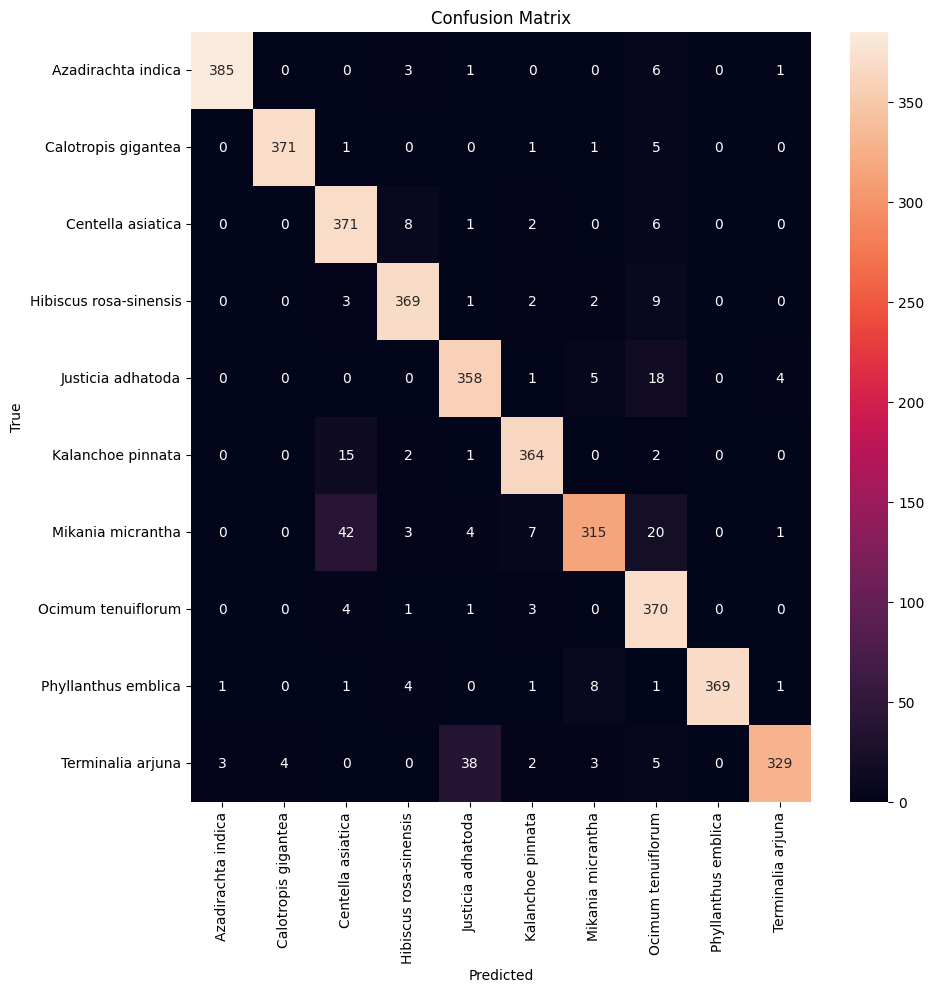

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')


print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1-score: {f1:.2f}')


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()